In [1]:
import matplotlib.pyplot as plt
from jax import config
config.update("jax_enable_x64", True)
import jax
from jax import numpy as jnp

from FABdiffME.targets.pi1300 import PI1300

## Test class `pi1300`

## Simple Matrix Element
- simplest model for matrix element of 3-body decay contains a resonance in channel (12) with mass $M$ and width $\Gamma$ and one in channel (12) with mass $M'$ and width $\Gamma'$
$$\pi(1300) \rightarrow 3 \pi$$
- reference: https://compwa-org--129.org.readthedocs.build/report/017.html
$$m_{\pi(1300)} = m_0 = 1.3 ~ \text{GeV}\\ m_{\pi} = m_1 = m_2 = m_3 = 0.14 ~ \text{GeV}$$

In [2]:
target = PI1300()
print("Initialized masses:", target.m0, target.m1, target.m2, target.m3)

Initialized masses: 1.3 0.14 0.14 0.14


### Plot Physical Region of Dalitz Plot

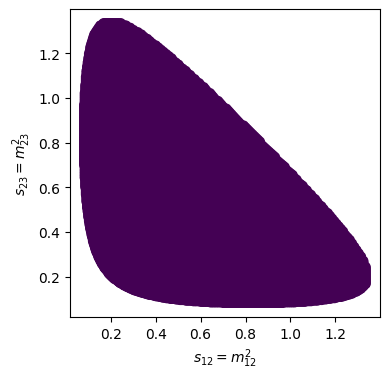

In [3]:
# setup grid with axes
s12vs = jnp.linspace(target.m1 + target.m2, target.m0 - target.m3, 200)[1:-1]**2
s23vs = jnp.linspace(target.m2 + target.m3, target.m0 - target.m1, 202)[1:-1]**2
grid = jnp.dstack(jnp.meshgrid(s12vs, s23vs))
grid = grid.reshape([-1, 2])

physical_region = target.is_physical_nan(grid[:,0], grid[:,1])

plt.figure(figsize=(4, 4))
plt.scatter(grid[:,0], grid[:,1], c=physical_region)
plt.xlabel(r"$s_{12} = m_{12}^2$")
plt.ylabel(r"$s_{23} = m_{23}^2$");

### Plot scalar matrix element

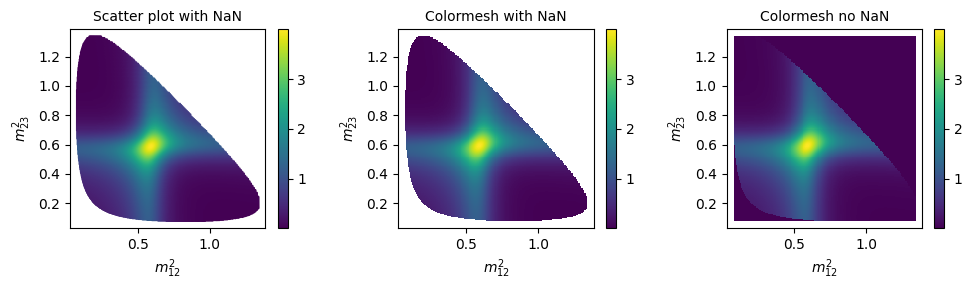

In [4]:
Iv_nan = target.get_decay_rate_nan(grid)

fig, axs = plt.subplots(1,3, figsize=(10, 3))
pcm0 = axs[0].scatter(grid[:,0], grid[:,1], c=Iv_nan, s=.5)
fig.colorbar(pcm0, ax=axs[0])
axs[0].set_xlabel(r"$m_{12}^2$")
axs[0].set_ylabel(r"$m_{23}^2$")
axs[0].set_xlim([jnp.min(s12vs)-0.05, jnp.max(s12vs)+0.05])
axs[0].set_ylim([jnp.min(s23vs)-0.05, jnp.max(s23vs)+0.05])
axs[0].set_title("Scatter plot with NaN", fontsize=10)

Iv_nan_re = Iv_nan.reshape([len(s23vs), len(s12vs)]).T
pcm1 = axs[1].pcolormesh(s12vs, s23vs, Iv_nan_re.T)
fig.colorbar(pcm1, ax=axs[1])
axs[1].set_xlabel(r"$m_{12}^2$")
axs[1].set_ylabel(r"$m_{23}^2$")
axs[1].set_xlim([jnp.min(s12vs)-0.05, jnp.max(s12vs)+0.05])
axs[1].set_ylim([jnp.min(s23vs)-0.05, jnp.max(s23vs)+0.05])
axs[1].set_title("Colormesh with NaN", fontsize=10)

Iv_0 = target.get_decay_rate(grid)
Iv_re = Iv_0.reshape([len(s23vs), len(s12vs)]).T
pcm2 = axs[2].pcolormesh(s12vs, s23vs, Iv_re.T)
fig.colorbar(pcm1, ax=axs[2])
axs[2].set_xlabel(r"$m_{12}^2$")
axs[2].set_ylabel(r"$m_{23}^2$")
axs[2].set_xlim([jnp.min(s12vs)-0.05, jnp.max(s12vs)+0.05])
axs[2].set_ylim([jnp.min(s23vs)-0.05, jnp.max(s23vs)+0.05])
axs[2].set_title("Colormesh no NaN", fontsize=10)

plt.tight_layout();

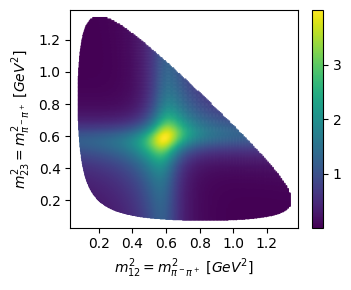

In [5]:
fig, axs = plt.subplots(1,1, figsize=(3.75, 3))
pcm0 = axs.scatter(grid[:,0], grid[:,1], c=Iv_nan, s=.3)
fig.colorbar(pcm0, ax=axs)
axs.set_xlabel(r"$m_{12}^2 = m^2_{\pi^-\pi^+} ~ [GeV^2]$")
axs.set_ylabel(r"$m_{23}^2 = m^2_{\pi^-\pi^+} ~ [GeV^2]$")
axs.set_xlim([jnp.min(s12vs)-0.05, jnp.max(s12vs)+0.05])
axs.set_ylim([jnp.min(s23vs)-0.05, jnp.max(s23vs)+0.05])
axs.xaxis.set_ticks(jnp.arange(0.2, 1.4, 0.2))  
axs.yaxis.set_ticks(jnp.arange(0.2, 1.4, 0.2))  
plt.tight_layout();

### Test transformation from square Dalitz plot to normal Dalitz plot

Row 1
- create grid in Dalitz plot space $[s_{12}, s_{23}]$
- transform to square DP via
$$I(\cos \theta_{12}, s_{23}) = I(s_{12}, s_{23}) \cdot \left| \frac{\partial s_{12}}{\partial \cos \theta_{12}} \right| = I(s_{12}, s_{23}) \cdot \left| \frac{\partial \cos \theta_{12}}{\partial s_{12}} \right|^{-1}$$
- transform square DP back to original DP via
$$I'(s_{12}, s_{23}) = I(\cos \theta_{12}, s_{23}) \cdot \left| \frac{\partial \cos \theta_{12}}{\partial s_{12}} \right| = I(\cos \theta_{12}, s_{23}) \cdot \left| \frac{\partial s_{12}}{\partial \cos \theta_{12}} \right|^{-1}$$

Row 2
- create grid in square Dalitz plot space $[\cos \theta_{12}, s_{23}]$, plot as second plot
- transform square DP back to original DP and evaluate intensity $I(s_{12}, s_{23})$ there (first plot) via
$$I(s_{12}, s_{23}) = I(\cos \theta_{12}, s_{23}) \cdot \left| \frac{\partial s_{12}}{\partial \cos \theta_{12}} \right|^{-1}$$
- transform $I(\cos \theta_{12}, s_{23})$ back to square DP:
$$I'(s_{12}', s_{23}') = I(\cos \theta_{12}, s_{23}) \left| \frac{\partial \cos \theta_{12}}{\partial s_{12}}\right| = I(\cos \theta_{12}, s_{23}) \left| \frac{\partial s_{12}}{\partial \cos \theta_{12}}\right|^{-1}$$

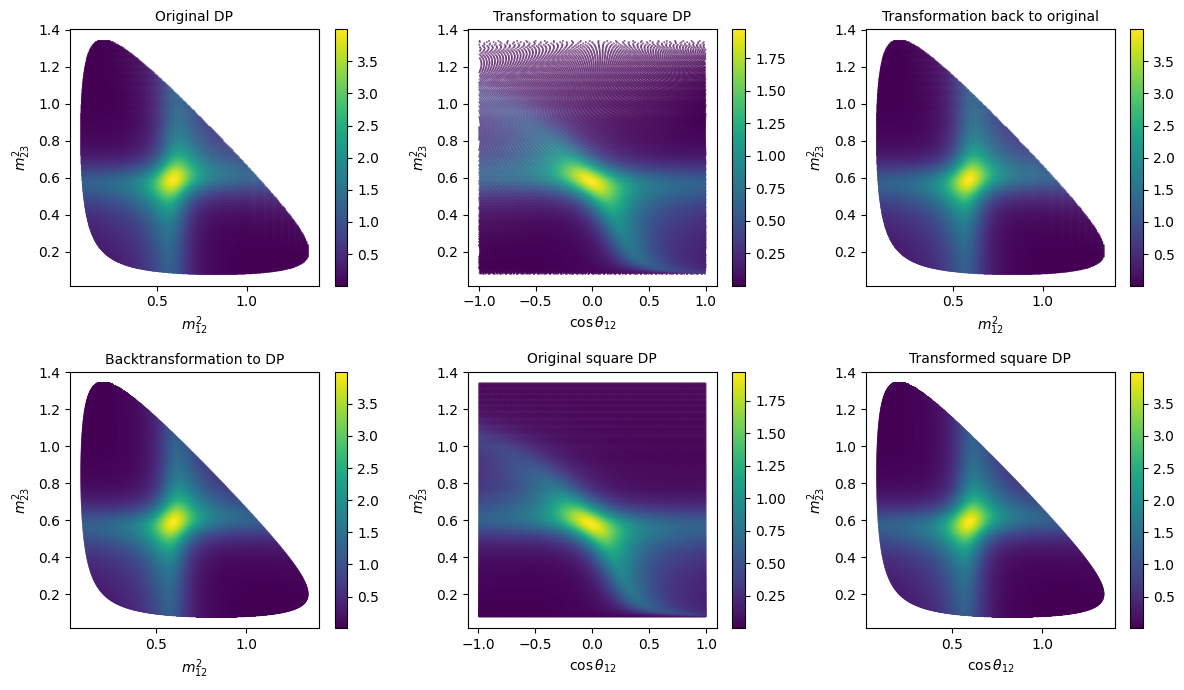

In [6]:
fig, axs = plt.subplots(2,3, figsize=(12,7))

# Original Dalitz plot

# setup grid with axes [s12, s23]
s12vs = jnp.linspace(target.m1 + target.m2, target.m0 - target.m3, 300)[1:-1]**2
s23vs = jnp.linspace(target.m2 + target.m3, target.m0 - target.m1, 302)[1:-1]**2
grid = jnp.dstack(jnp.meshgrid(s12vs, s23vs))
grid = grid.reshape([-1, 2])
I_original = target.get_decay_rate_nan(grid)

pcm0 = axs[0,0].scatter(grid[:,0], grid[:,1], c=I_original, s=.1)
fig.colorbar(pcm0, ax=axs[0,0])
axs[0,0].set_title(r"Original DP", fontsize=10)
axs[0,0].set_xlabel(r"$m_{12}^2$")
axs[0,0].set_ylabel(r"$m_{23}^2$")

# Transform to square DP
grid_square, dcds = target.get_cos_theta_from_s12(grid)
I_square_transformed = I_original / jnp.abs(dcds)

pcm1 = axs[0,1].scatter(grid_square[:,0], grid_square[:,1], c=I_square_transformed, s=.1)
fig.colorbar(pcm1, ax=axs[0,1])
axs[0,1].set_title(r"Transformation to square DP", fontsize=10)
axs[0,1].set_xlabel(r"$\cos \theta_{12}$")
axs[0,1].set_ylabel(r"$m_{23}^2$")

# Transform back to original DP
grid_original, dsdc = target.get_s12_from_cos_theta(grid_square)
I_original_transformed = I_square_transformed / jnp.abs(dsdc)
pcm2 = axs[0,2].scatter(grid_original[:,0], grid_original[:,1], c=I_original_transformed, s=.1)
fig.colorbar(pcm2, ax=axs[0,2])
axs[0,2].set_title(r"Transformation back to original", fontsize=10)
axs[0,2].set_xlabel(r"$m_{12}^2$")
axs[0,2].set_ylabel(r"$m_{23}^2$")

# setup grid with axes [costheta, s23]
cos_thetas = jnp.linspace(-1., 1, 300)[1:-1]
s23vs = jnp.linspace(target.m2 + target.m3, target.m0 - target.m1, 302)[1:-1]**2
grid_square = jnp.dstack(jnp.meshgrid(cos_thetas, s23vs))
grid_square = grid_square.reshape([-1, 2])
# transform back to DP
grid_backw, dsdc = target.get_s12_from_cos_theta(grid_square)
I_back = target.get_decay_rate(grid_backw)
I_square = I_back * jnp.abs(dsdc)
I_square_orig = target.get_decay_rate_square(grid_square)

# Back to original Dalitz plot
pcm2 = axs[1,0].scatter(grid_backw[:,0], grid_backw[:,1], c=I_back, s=.1)
fig.colorbar(pcm2, ax=axs[1,0])
axs[1,0].set_title(r"Backtransformation to DP", fontsize=10)
axs[1,0].set_xlabel(r"$m_{12}^2$")
axs[1,0].set_ylabel(r"$m_{23}^2$")

# Square DP
pcm1 = axs[1,1].scatter(grid_square[:,0], grid_square[:,1], c=I_square, s=.1)
fig.colorbar(pcm1, ax=axs[1,1])
axs[1,1].set_title(r"Original square DP", fontsize=10)
axs[1,1].set_xlabel(r"$\cos \theta_{12}$")
axs[1,1].set_ylabel(r"$m_{23}^2$")

# Forward to DP
grid_forward, dsdc_square = target.get_s12_from_cos_theta(grid_square)
I_square_transformed = I_square_orig / jnp.abs(dsdc_square)
pcm3 = axs[1,2].scatter(grid_forward[:,0], grid_forward[:,1], c=I_square_transformed, s=.1)
fig.colorbar(pcm3, ax=axs[1,2])
axs[1,2].set_title(r"Transformed square DP", fontsize=10)
axs[1,2].set_xlabel(r"$\cos \theta_{12}$")
axs[1,2].set_ylabel(r"$m_{23}^2$")

plt.tight_layout();

### Scale original Dalitz plot to square and to unit interval (and other direction)

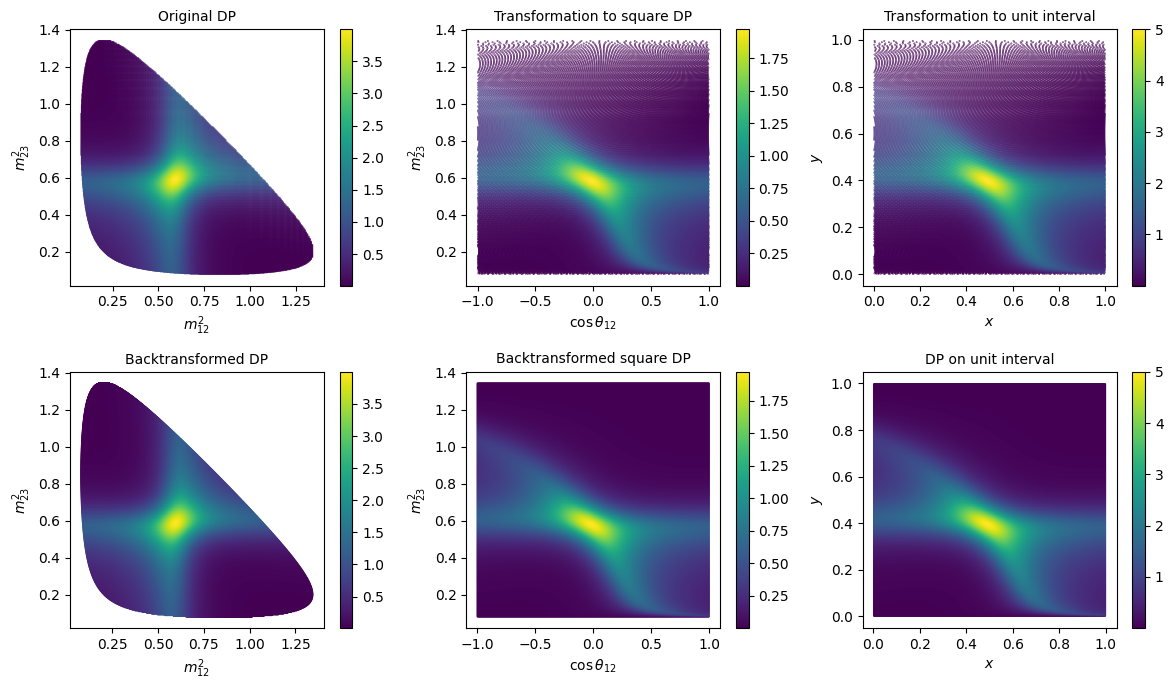

In [7]:
fig, axs = plt.subplots(2,3, figsize=(12,7))

# Original Dalitz plot

# setup grid with axes [s12, s23]
s12vs = jnp.linspace(target.m1 + target.m2, target.m0 - target.m3, 300)[1:-1]**2
s23vs = jnp.linspace(target.m2 + target.m3, target.m0 - target.m1, 302)[1:-1]**2
grid = jnp.dstack(jnp.meshgrid(s12vs, s23vs))
grid = grid.reshape([-1, 2])
I_original = target.get_decay_rate_nan(grid)

pcm0 = axs[0,0].scatter(grid[:,0], grid[:,1], c=I_original, s=.1)
fig.colorbar(pcm0, ax=axs[0,0])
axs[0,0].set_title(r"Original DP", fontsize=10)
axs[0,0].set_xlabel(r"$m_{12}^2$")
axs[0,0].set_ylabel(r"$m_{23}^2$")

# Transform to square DP
grid_square, dcds = target.get_cos_theta_from_s12(grid)
I_square_transformed = I_original / jnp.abs(dcds)

pcm1 = axs[0,1].scatter(grid_square[:,0], grid_square[:,1], c=I_square_transformed, s=.1)
fig.colorbar(pcm1, ax=axs[0,1])
axs[0,1].set_title(r"Transformation to square DP", fontsize=10)
axs[0,1].set_xlabel(r"$\cos \theta_{12}$")
axs[0,1].set_ylabel(r"$m_{23}^2$")

# Transform to [0,1]^2 interval
grid_unit, detJ = target.scale_samples_to_unit_interval(grid_square)
dxdcos, dyds23 = detJ[:,0], detJ[:,1]
I_unit = I_square_transformed * jnp.where(dxdcos.any()==0 or dyds23.any()==0, 0, 1/jnp.abs(dxdcos * dyds23))
pcm2 = axs[0,2].scatter(grid_unit[:,0], grid_unit[:,1], c=I_unit, s=.1)
fig.colorbar(pcm2, ax=axs[0,2])
axs[0,2].set_title(r"Transformation to unit interval", fontsize=10)
axs[0,2].set_xlabel(r"$x$")
axs[0,2].set_ylabel(r"$y$")


# Unit interval grid
# setup grid with axes [x, y]
x = y = jnp.linspace(0., 1., 300)[1:-1]
grid_unit = jnp.dstack(jnp.meshgrid(x, y))
grid_unit = grid_unit.reshape([-1, 2])

# transform back to square DP
grid_square, detJ = target.scale_samples_to_original_interval(grid_unit)
dcosdx, ds23dy = detJ[:,0], detJ[:,1]

# transform back to DP
dp_grid, ds12dcos = target.get_s12_from_cos_theta(grid_square)
I_dp = target.get_decay_rate_nan(dp_grid)
I_square = I_dp * jnp.abs(ds12dcos)
I_unit = I_square * jnp.abs(dcosdx) * jnp.abs(ds23dy)
I_dp_no_nan = jnp.nan_to_num(I_dp, nan=-1)
I_square_no_nan = jnp.nan_to_num(I_square, nan=-1)
I_unit_no_nan = jnp.nan_to_num(I_unit, nan=-1)

# Plot backtransformed original DP
pcm2 = axs[1,0].scatter(dp_grid[:,0], dp_grid[:,1], c=I_dp_no_nan, s=.5)
fig.colorbar(pcm2, ax=axs[1,0])
axs[1,0].set_title(r"Backtransformed DP", fontsize=10)
axs[1,0].set_xlabel(r"$m_{12}^2$")
axs[1,0].set_ylabel(r"$m_{23}^2$")

# Plot backtransformed square DP
pcm1 = axs[1,1].scatter(grid_square[:,0], grid_square[:,1], c=I_square_no_nan, s=.5)
fig.colorbar(pcm1, ax=axs[1,1])
axs[1,1].set_title(r"Backtransformed square DP", fontsize=10)
axs[1,1].set_xlabel(r"$\cos \theta_{12}$")
axs[1,1].set_ylabel(r"$m_{23}^2$")

# Plot init interval DP
pcm3 = axs[1,2].scatter(grid_unit[:,0], grid_unit[:,1], c=I_unit_no_nan, s=.5)
fig.colorbar(pcm3, ax=axs[1,2])
axs[1,2].set_title(r"DP on unit interval", fontsize=10)
axs[1,2].set_xlabel(r"$x$")
axs[1,2].set_ylabel(r"$y$")
axs[1,2].set_ylim([-0.05, 1.05])

plt.tight_layout();

### Test transformation functions that are important for flow training
- input: samples from flow $(x, y)$
- transform samples: $(x, y) \rightarrow (\cos \theta_{12}, s_{23}) \rightarrow (s_{12}, s_{23})$
- evaluate $I(s_{12}, s_{23}) = \tilde{p}(s_{12}, s_{23})$
- transform $\tilde{p}(s_{12}, s_{23})$ to $\tilde{p}(x, y)$ via
$$\tilde{p}(x, y)  = I(x,y) = I(s_{12}, s_{23})\cdot \left| \frac{\partial s_{12}}{\partial \cos \theta_{12}} \right| \cdot \left| \frac{\partial \cos \theta_{12}}{\partial x} \right| \cdot \left| \frac{\partial s_{23}}{\partial y} \right|$$

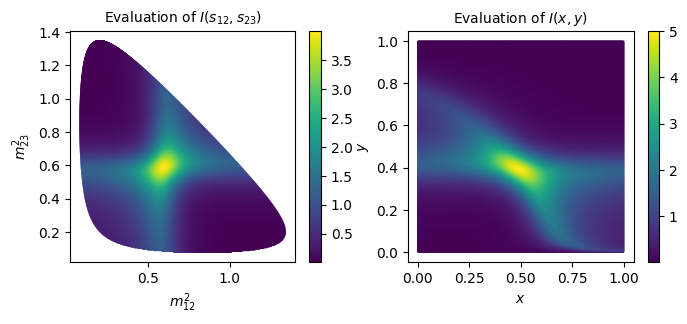

In [8]:
x = y = jnp.linspace(0., 1., 300)[1:-1]
grid_unit = jnp.dstack(jnp.meshgrid(x, y))
grid_unit = grid_unit.reshape([-1, 2])

ev_grid_unit = target.evaluate_DP_on_unit_interval(grid_unit)
grid_dp, ev_grid_dp = target.evaluate_DP_on_physical_space(grid_unit)

fig, axs = plt.subplots(1,2, figsize=(8, 3))
pcm0 = axs[0].scatter(grid_dp[:,0], grid_dp[:,1], c=ev_grid_dp, s=.1)
fig.colorbar(pcm0, ax=axs[0])
axs[0].set_xlabel(r"$m_{12}^2$")
axs[0].set_ylabel(r"$m_{23}^2$")
axs[0].set_title("Evaluation of $I(s_{12}, s_{23})$", fontsize=10)

pcm1 = axs[1].scatter(grid_unit[:,0], grid_unit[:,1], c=ev_grid_unit, s=.5)
fig.colorbar(pcm1, ax=axs[1])
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$y$")
axs[1].set_title("Evaluation of $I(x, y)$", fontsize=10);

### Test `log_prob` method

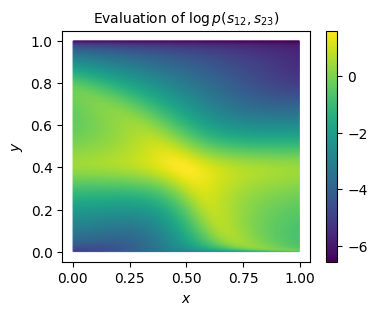

In [9]:
# Unit interval grid
# setup grid with axes [x, y]
x = y = jnp.linspace(0., 1., 300)[1:-1]
grid_unit = jnp.dstack(jnp.meshgrid(x, y))
grid_unit = grid_unit.reshape([-1, 2])

log_probs = target.log_prob(grid_unit)
fig, axs = plt.subplots(1,1, figsize=(4, 3))
pcm0 = axs.scatter(grid_unit[:,0], grid_unit[:,1], c=log_probs, s=.1)
fig.colorbar(pcm0, ax=axs)
axs.set_xlabel(r"$x$")
axs.set_ylabel(r"$y$")
axs.set_title(r"Evaluation of $\log p(s_{12}, s_{23})$", fontsize=10);

### Test function that generates samples from Dalitz plot

In [10]:
# Generate samples
key = jax.random.PRNGKey(3)
gen_samples, target_eval_count = target.sample(key, 100)

2 / 100


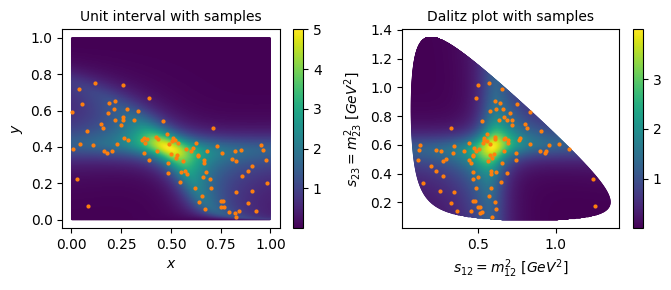

In [11]:
unit_axis = jnp.linspace(0, 1, 300)[1:-1] # x, y
grid_unit = jnp.dstack(jnp.meshgrid(unit_axis, unit_axis))
grid_unit = grid_unit.reshape([-1, 2])

I_unit = target.evaluate_DP_on_unit_interval(grid_unit)

fig, axs = plt.subplots(1, 2, figsize=(7, 3))
pcm0 = axs[0].scatter(grid_unit[:,0], grid_unit[:,1], c=I_unit, s=.5)
cbar = fig.colorbar(pcm0, ax=axs[0])
axs[0].set_title(r"Unit interval with samples", fontsize=10)

axs[0].scatter(gen_samples[:,0], gen_samples[:,1], c="tab:orange", s=4)
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$y$")

grid_dp, I_dp = target.evaluate_DP_on_physical_space(grid_unit)
gen_samples_dp, _ = target.evaluate_DP_on_physical_space(gen_samples)

pcm1 = axs[1].scatter(grid_dp[:,0], grid_dp[:,1], c=I_dp, s=.5)
cbar = fig.colorbar(pcm1, ax=axs[1])
axs[1].set_title(r"Dalitz plot with samples", fontsize=10)
axs[1].scatter(gen_samples_dp[:,0], gen_samples_dp[:,1], c="tab:orange", s=4)
axs[1].set_xlabel(r"$s_{12} = m_{12}^2 ~ [GeV^2]$")
axs[1].set_ylabel(r"$s_{23} = m_{23}^2 ~ [GeV^2]$")

plt.tight_layout();